Observationally, studies of doppler shift maps have shown that many dense cores have measured non-negligible,systematic velocities. This is important because the centrifugal force introduces an additional support for the sphere to counter the gravitational infall. 

While it is easy to think about a rotating sphere, putting rotation on a Cartesian grid is a bit more tricky, in particular, we need to enforce: 



   1. Solid body rotation $\leftrightarrow d\Omega/dr = 0$.
   2. Everything should be rotating in a plane $v_z=0$ (angular momentum in the $z$-direction).


We can get the $\Omega$ from either the energy-balance or the force-balance approach, where $\beta$ is our tuning parameter and determines whether the sphere is rotationally-supported or collapsing.
\begin{align}
\beta = \frac{E_{k,rot}}{E_{p,grav}}
\\ \boxed{\Omega \approx\sqrt{\frac{\beta GM}{R^3}}}
\end{align}
Given x, y, z,$\Omega$ , we can get:
\begin{align}
\theta = cos^{-1}(\frac{z}{r})
\\ \boxed{\phi = tan^{-1}(\frac{y}{x})}
\\ r = \sqrt{x^2+y^2+z^2}
\end{align}
From the conservation of angular momentum (things should rotate in a plane), $V_z = 0$.  Enforcing solid body rotation  $$\Omega = \frac{|V|}{r}= \frac{\sqrt{V_x^2+V_y^2}}{r}$$. 

We can solve this by two approaches to enforce circular rotation: 

###  $\vec{\rho}\perp\vec{v}$ Approach
Let $\vec{\rho}$ be the cylindrical radial vector
\begin{align}
\vec{\rho} = \vec{r}sin\theta
\\ \vec{\rho}\cdot \vec{v} = 0 
\\ V_x  = -V_y tan\phi
\end{align}
when $\theta \neq 0,\pi$. (Note that Method 2 doesn't have this constraint on $\theta$. ) 

### Geometric Approach
Looking at a top-down view, we can determine geometrically:
\begin{align}
V_y = - v sin\phi
\\ V_x  = v cos\phi
\end{align}
Dividing the two we get: $V_x  = -V_y tan\phi$. 
\begin{align}
\boxed{V_y = - \Omega r sin\phi}
\\ \boxed{V_x  =  \Omega r cos\phi}
\end{align}


In [1]:
%pylab inline
from  scripts.plotSim import *

Populating the interactive namespace from numpy and matplotlib


Setup :
    
    ./setup RotatingSinkSphere -3d +usm --maxblock=500 -auto ; cd object/;make -j8;cd ..;

### Initial Conditions

~~~fortran
!Computed from 3*G*M/(rmax/1.057e-17)**3
omega = sqrt(2.2196e-25*beta_param) 
...
rr = sqrt(xx**2 + yy**2 + zz**2)
phi =  atan(yy/xx)
....
velxZone = abs(omega*rr*sin(phi))
velyZone = abs(omega*rr*cos(phi))

if (xx<0) then
   velyZone=-velyZone
endif
if (yy>0) then
   velxZone=-velxZone
endif
if (rc >=18.719) then
   velxZone = velxZone*exp(-(rc-18.719)/9.35)
   velyZone = velyZone*exp(-(rc-18.719)/9.35)
endif
velzZone = 0.0
~~~

Note that we need to explicitly specify the direction of the velocities because the arctangent that is computed in fortran only return ranges from $\epsilon[0,\pi/2]$. We also damp the velocity outside of the sphere, so that the velocity at the edge of the box is not too high. (The only important physics in the problem is the sphere itself rotating)

### Running the example

Code example up to now is in ``RotatingSinkSphere/``.

In [3]:
cd ../proj/dlee/FLASH4.3/object/

/global/project/projectdirs/astro250/dlee/FLASH4.3/object



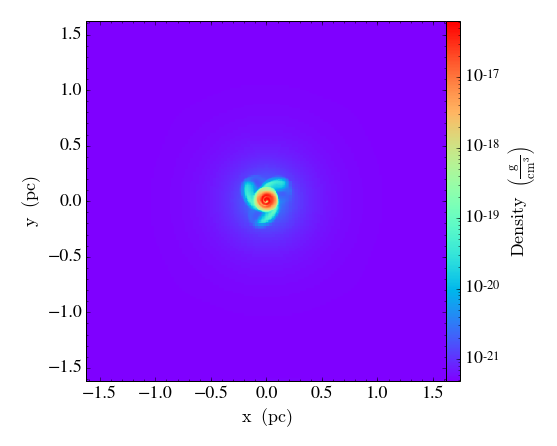

In [4]:
plot_dens(612)

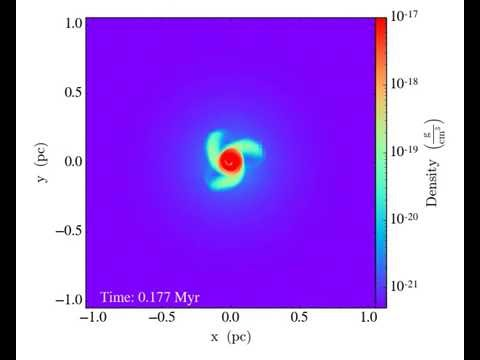

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo("XnIdxSPN0_A",width=520,height=420)